# Problem 2.55

page 84

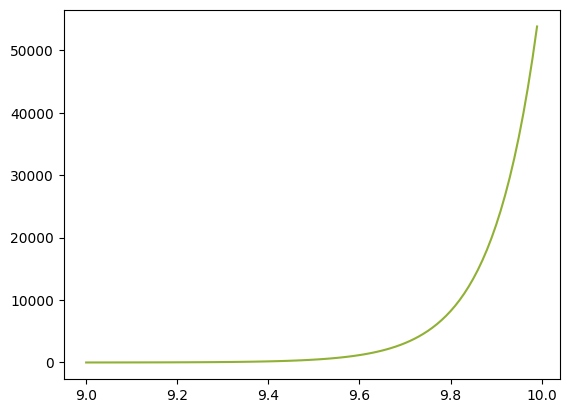

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

K = 1.1

def solvr(Y, t):
    return [Y[1], (t ** 2 - K) * Y[0]]

a_t = np.arange(9.0, 10.0, 0.01)
asol = integrate.odeint(solvr, [1, 0], a_t)

plt.plot(a_t, asol[:, 1], color='xkcd:avocado',label='Scipy Solution')